<a href="https://colab.research.google.com/github/AhmedSalaahh/Euro2024_EDA/blob/main/Euro2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('euro2024_players.csv')
df.head(5)

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [ ]:
df.isna().sum()

Name           0
Position       0
Age            0
Club           0
Height         0
Foot           3
Caps           0
Goals          0
MarketValue    0
Country        0
dtype: int64

In [ ]:
df.describe()

,Age,Height,Caps,Goals,MarketValue
count,623.000000,623.000000,623.000000,623.000000,6.230000e+02
mean,27.040128,184.181380,30.338684,4.152488,1.840903e+07
std,4.124275,6.569258,30.987902,10.086803,2.426195e+07
min,16.000000,167.000000,0.000000,0.000000,5.000000e+04
25%,24.000000,180.000000,7.000000,0.000000,2.900000e+06
50%,27.000000,185.000000,21.000000,1.000000,9.000000e+06
75%,30.000000,189.000000,42.000000,4.000000,2.500000e+07
max,41.000000,202.000000,206.000000,128.000000,1.800000e+08


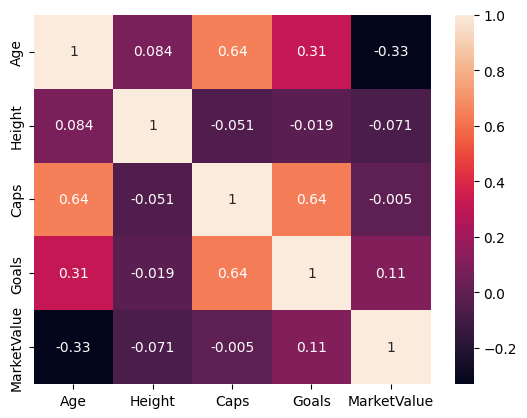

In [ ]:
corr_matrix = df[['Age','Height',	'Caps',	'Goals', 'MarketValue']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


<ipython-input-115-4862b8584ff4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=goals_per_position.index, y=goals_per_position.values, palette=colors)


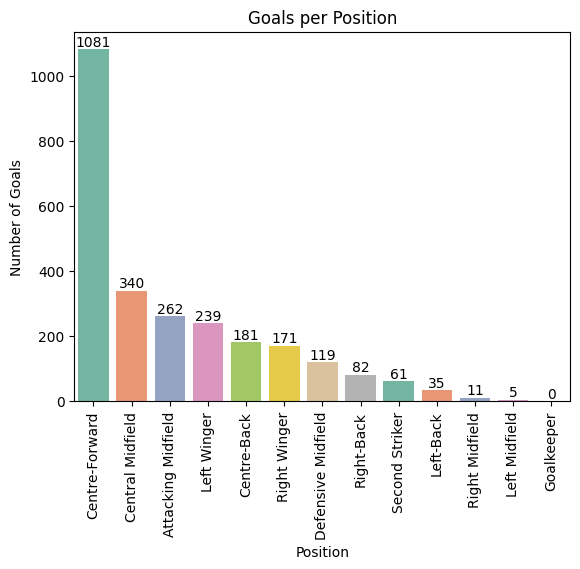

In [ ]:
goals_per_position = df.groupby('Position')['Goals'].sum().sort_values(ascending=False)

colors = sns.color_palette('Set2', len(goals_per_position))
sns.barplot(x=goals_per_position.index, y=goals_per_position.values, palette=colors)
# Add the values to the top of each bar
for i, value in enumerate(goals_per_position.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.title('Goals per Position')
x_ticks = plt.xticks(rotation=90)
plt.ylabel('Number of Goals')
plt.show()

<ipython-input-103-8c9d6426903f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dominant_foot.index, y=dominant_foot.values, palette=colors)
<ipython-input-103-8c9d6426903f>:3: UserWarning: The palette list has more values (13) than needed (4), which may not be intended.
  sns.barplot(x=dominant_foot.index, y=dominant_foot.values, palette=colors)


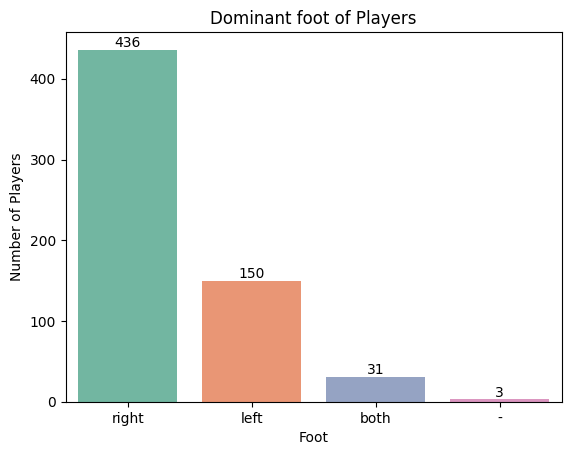

In [ ]:
dominant_foot = df['Foot'].value_counts()

sns.barplot(x=dominant_foot.index, y=dominant_foot.values, palette=colors)

# Add the values to the top of each bar
for i, value in enumerate(dominant_foot.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.xlabel('Foot')
plt.ylabel('Number of Players')
plt.title('Dominant foot of Players')
plt.show()

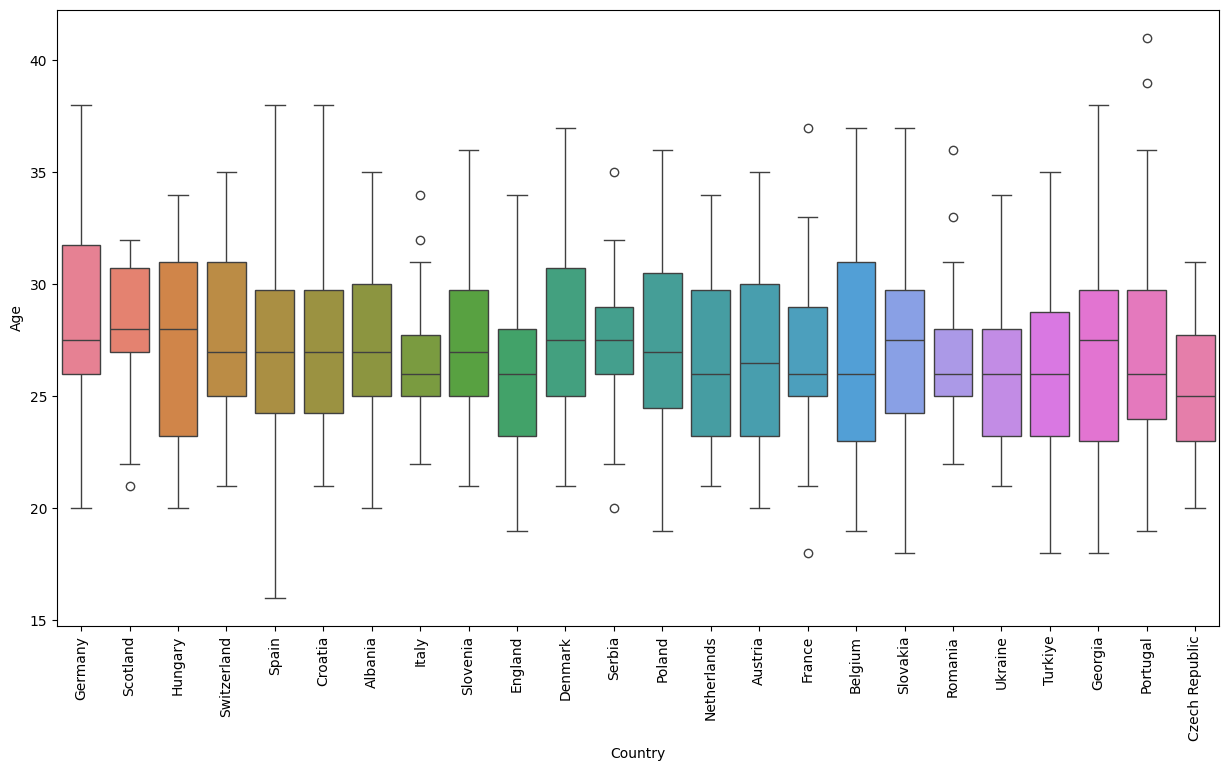

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Country', y='Age', data=df, hue='Country')
plt.xticks(rotation=90)
plt.show
%matplotlib inline

<ipython-input-96-fadfbc222dee>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_per_country.index, y=value_per_country.values/ 1000000, palette=colors)
<ipython-input-96-fadfbc222dee>:6: UserWarning: 
The palette list has fewer values (13) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=value_per_country.index, y=value_per_country.values/ 1000000, palette=colors)


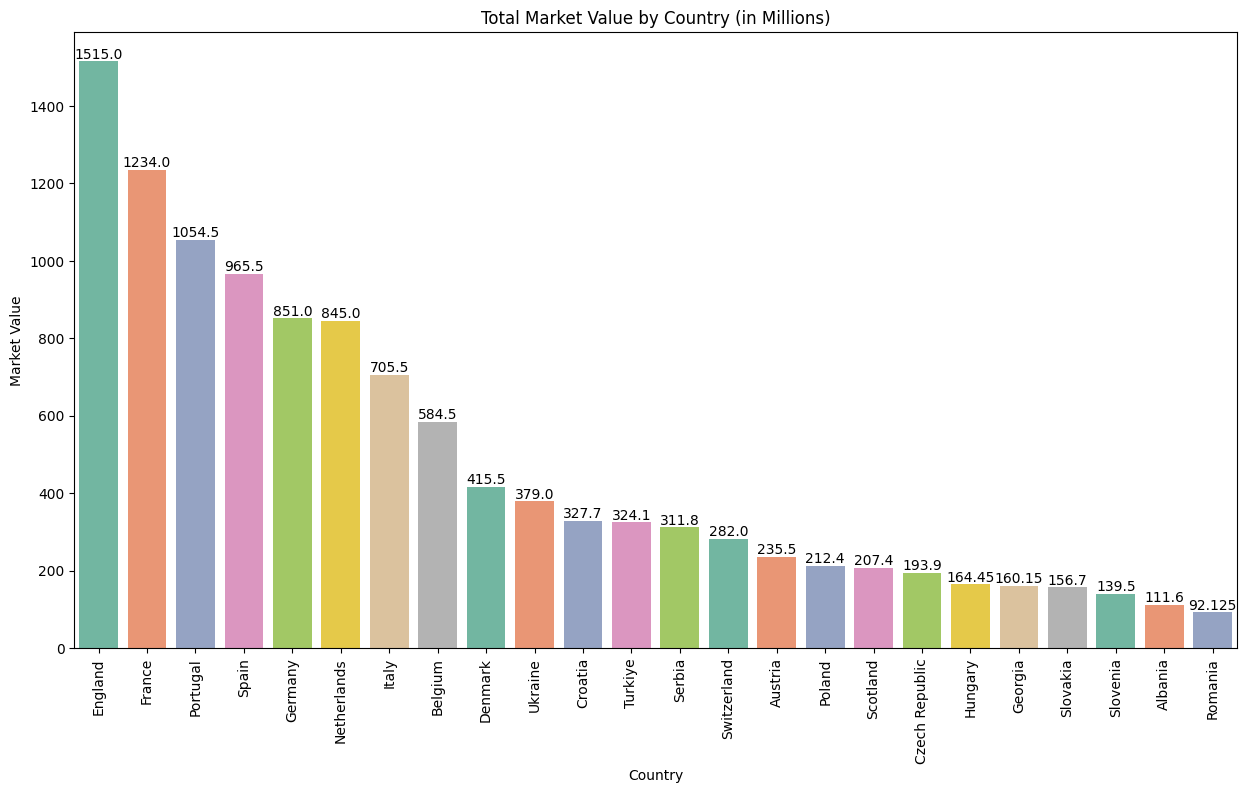

In [ ]:
value_per_country = df.groupby('Country')['MarketValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 8))

# Create the bar plot
sns.barplot(x=value_per_country.index, y=value_per_country.values/ 1000000, palette=colors)

# Add the values to the top of each bar
for i, value in enumerate(value_per_country.values):
    plt.text(i, value/ 1000000, str(value/ 1000000), ha='center', va='bottom')

plt.ylabel('Market Value')
plt.title('Total Market Value by Country (in Millions)')
plt.xticks(rotation=90)
plt.show()


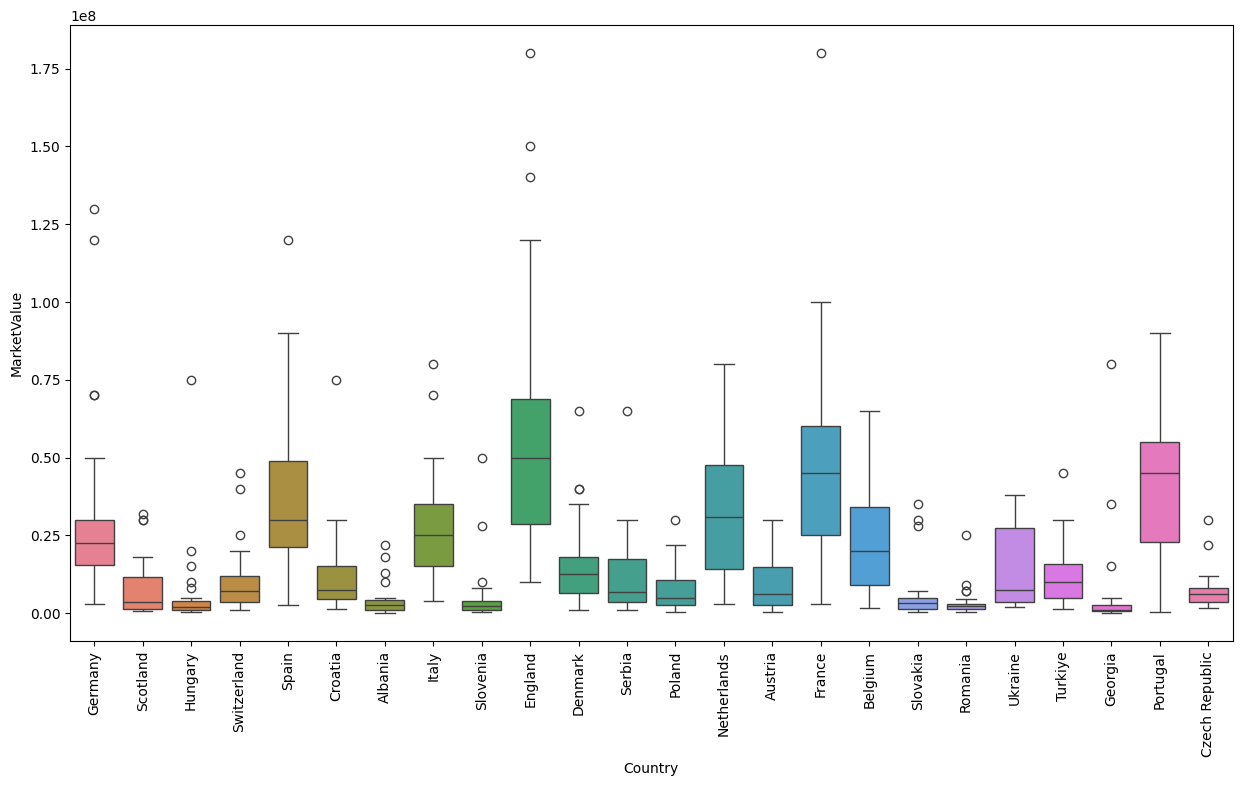

In [ ]:
plt.figure(figsize=(15, 8))
# MarketValue_per_country = df.groupby('Country')['MarketValue']
sns.boxplot(x='Country', y='MarketValue', data=df, hue='Country')
plt.xticks(rotation=90)
plt.show
%matplotlib inline

In [ ]:
Q1 = df['MarketValue'].quantile(0.25)
Q3 = df['MarketValue'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['MarketValue'] < lower_bound) | (df['MarketValue'] > upper_bound)]

# Print the outliers
print("Number of outliers: ", outliers.shape[0])
print(outliers[['Name', 'Club', 'Country', 'MarketValue']].sort_values(by='MarketValue', ascending=False))

Number of outliers:  41
                       Name                 Club      Country  MarketValue
411           Kylian Mbappé  Paris Saint-Germain       France    180000000
250         Jude Bellingham          Real Madrid      England    180000000
254              Phil Foden      Manchester City      England    150000000
255             Bukayo Saka           Arsenal FC      England    140000000
17            Florian Wirtz  Bayer 04 Leverkusen      Germany    130000000
246             Declan Rice           Arsenal FC      England    120000000
115                   Rodri      Manchester City        Spain    120000000
18            Jamal Musiala        Bayern Munich      Germany    120000000
404       Eduardo Camavinga          Real Madrid       France    100000000
402     Aurélien Tchouaméni          Real Madrid       France    100000000
257              Harry Kane        Bayern Munich      England    100000000
590             Rafael Leão             AC Milan     Portugal     90000000
1

<ipython-input-62-85a19029edf5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=club_counts.values, y=club_counts.index, palette='Set2')


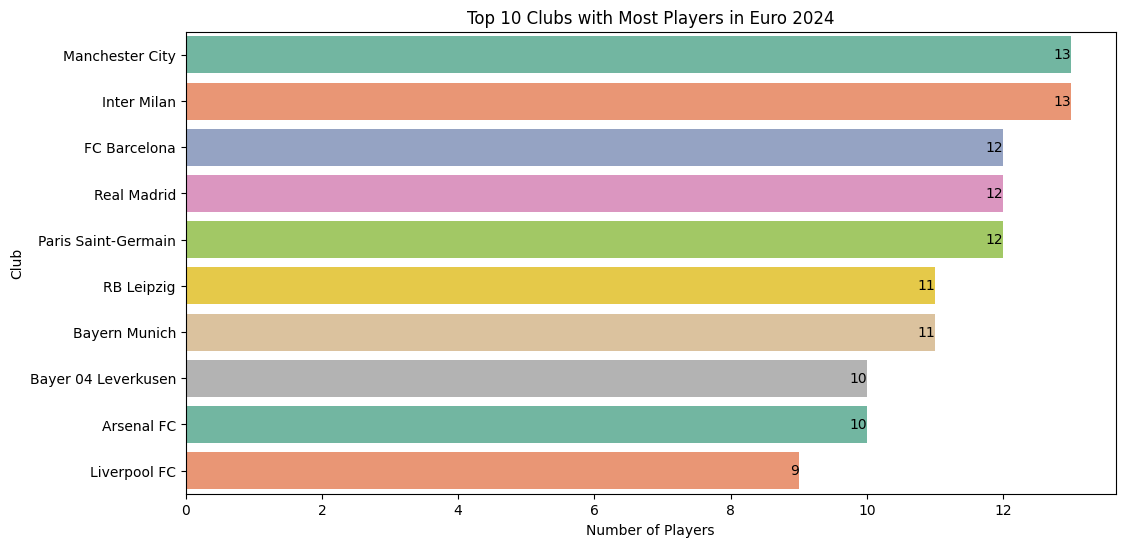

In [ ]:
club_counts = df['Club'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=club_counts.values, y=club_counts.index, palette='Set2')

# Add the values to the left of each bar
for i, value in enumerate(club_counts.values):
    plt.text(value, i, str(value), ha='right', va='center')

plt.xlabel('Number of Players')
plt.ylabel('Club')
plt.title('Top 10 Clubs with Most Players in Euro 2024')
plt.show()


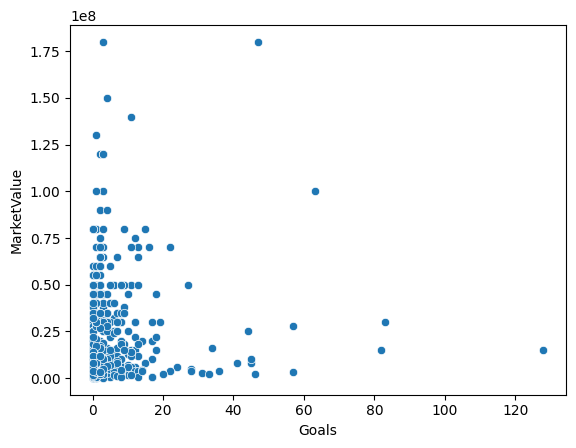

In [ ]:
sns.scatterplot(x='Goals', y='MarketValue', data=df)
plt.show
%matplotlib inline

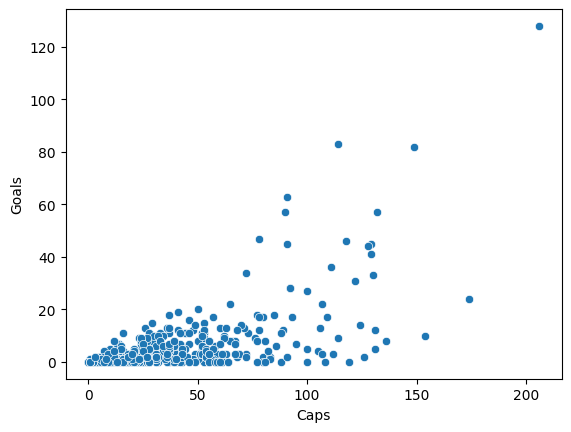

In [ ]:
sns.scatterplot(x='Caps', y='Goals', data=df)
plt.show
%matplotlib inline

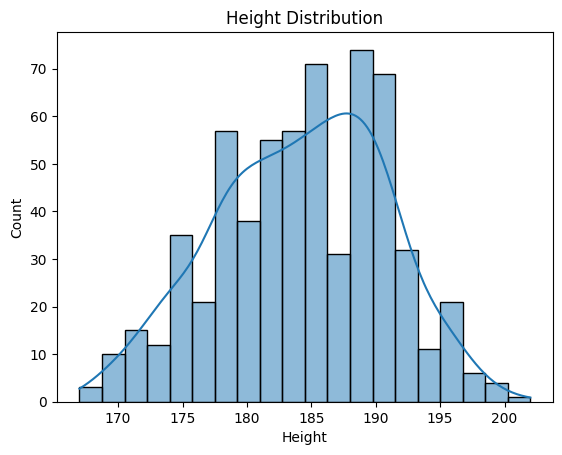

In [ ]:
sns.histplot(df['Height'], bins=20, kde=True)
plt.title('Height Distribution')
plt.show()